In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [2]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
#train data의 일부를 봄
train_df
#train data에서 null인 것이 몇개 있는지 파악
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

In [3]:
#정규식을 이용한 호칭 분류
#\w = 문자 및 숫자와 매치 [a-zA-Z0-9_]와 동일한 표현식이다.
#+는 앞의 문자가 최소 한번이상반복되어야 매치된다.
pat = re.compile('[\w]+, ([\w]+)')

#findall함수 : 정규식과 매칭되는 모든 문자열을 리스트로 반환
#이름에서 호칭을 추출하는 함수 정의
def find_name_title(x):
    return pat.findall(x)[0]

#이름 내용을 호칭으로 변경한다
train_df['Name'] = train_df['Name'].apply(find_name_title)
test_df['Name'] = test_df['Name'].apply(find_name_title)

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
887,888,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C
889,890,0,3,Mr,male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
#Cabin의 종류를 알기 위해 앞 문자 가져오기
pat_cabin = re.compile('([\w])[0-9]*')

def Cabin_word(x):
    if x is not np.nan and x is not None:
        return pat_cabin.findall(x)[0]
    else: return 'X'

train_df['Cabin_C'] = train_df['Cabin'].apply(Cabin_word)
test_df['Cabin_C'] = test_df['Cabin'].apply(Cabin_word)

In [6]:
#one-hot-encoding and drop(원치 않는 컬럼 삭제)
train_dummy = pd.get_dummies(data=train_df,columns=['Sex','Embarked','Cabin_C']).drop(['Name','PassengerId','Ticket','Cabin'], axis=1)
test_dummy = pd.get_dummies(data=test_df,columns=['Sex','Embarked','Cabin_C']).drop(['Name','PassengerId','Ticket','Cabin'], axis=1)

In [7]:
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
 11  Cabin_C_A   891 non-null    uint8  
 12  Cabin_C_B   891 non-null    uint8  
 13  Cabin_C_C   891 non-null    uint8  
 14  Cabin_C_D   891 non-null    uint8  
 15  Cabin_C_E   891 non-null    uint8  
 16  Cabin_C_F   891 non-null    uint8  
 17  Cabin_C_G   891 non-null    uint8  
 18  Cabin_C_X   891 non-null    uint8  
dtypes: float64(2), int64(4), uint

In [8]:
#K-Nearest Neighbor Algorithm을 이용한 나이 예측
knn = KNeighborsRegressor()
#나이가 있는 데이터를 이용하여 모델 생성
knn.fit(train_dummy[train_dummy['Age'].isnull()==False][train_dummy.columns.drop('Age')],
        train_dummy[train_dummy['Age'].isnull()==False]['Age'])

# 나이가 결측인 데이터를 예측
guesses = knn.predict(train_dummy[train_dummy['Age'].isnull()==True][train_dummy.columns.drop('Age')])
guesses

array([47.8  , 30.4  , 18.4  , 32.8  , 17.6  , 32.   , 21.584, 17.6  ,
       24.6  , 28.7  , 37.2  , 33.2  , 17.6  , 26.4  , 42.   , 38.   ,
       17.   , 32.   , 37.2  , 17.6  , 37.2  , 37.2  , 32.   , 32.6  ,
       24.4  , 37.2  , 47.8  , 17.6  , 20.4  , 34.8  , 23.4  , 37.   ,
       33.8  , 59.2  , 34.2  , 37.   , 35.4  , 46.8  , 28.8  , 47.8  ,
       17.6  , 37.   , 47.8  , 32.   , 21.2  , 26.6  , 16.5  , 28.8  ,
       34.8  , 46.4  , 47.8  , 21.5  , 44.8  , 17.6  , 33.4  , 55.4  ,
       38.   , 48.   , 17.6  , 24.4  , 26.9  , 37.2  , 30.6  , 37.   ,
       23.2  , 40.4  , 32.   , 36.2  , 52.6  , 32.8  , 17.6  , 17.6  ,
       33.2  , 18.4  , 17.6  , 36.4  , 32.   , 42.7  , 21.2  , 32.   ,
       33.5  , 33.4  , 22.8  , 28.7  , 34.8  , 47.8  , 36.2  , 26.   ,
       27.   , 37.2  , 42.8  , 47.8  , 37.2  , 33.4  , 42.7  , 34.8  ,
       41.   , 33.4  , 21.2  , 27.   , 22.4  , 30.3  , 20.3  , 51.4  ,
       37.2  , 32.6  , 32.8  , 29.9  , 30.8  , 29.9  , 22.8  , 46.2  ,
      

In [9]:
train_dummy.loc[train_dummy['Age'].isnull()==True,'Age'] = guesses
train_dummy.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Cabin_C_A     0
Cabin_C_B     0
Cabin_C_C     0
Cabin_C_D     0
Cabin_C_E     0
Cabin_C_F     0
Cabin_C_G     0
Cabin_C_X     0
dtype: int64

In [10]:
#Age와 Fare 카테고리화
train_dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_C_A,Cabin_C_B,Cabin_C_C,Cabin_C_D,Cabin_C_E,Cabin_C_F,Cabin_C_G,Cabin_C_X
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,19.0,0,0,30.0000,1,0,0,0,1,0,1,0,0,0,0,0,0
887,0,3,26.8,1,2,23.4500,1,0,0,0,1,0,0,0,0,0,0,0,1
888,1,1,26.0,0,0,30.0000,0,1,1,0,0,0,0,1,0,0,0,0,0
889,0,3,32.0,0,0,7.7500,0,1,0,1,0,0,0,0,0,0,0,0,1


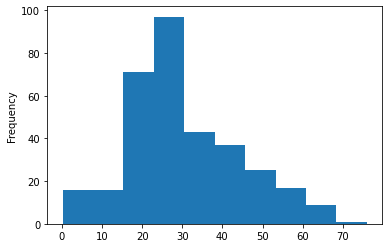

In [11]:
#히스토그램 시각화 bin = 나타내고 싶은 막대기의 개수
#pandas cut : 연속형 변수의 구간 분할 (labels:각 구간의 이름 부여)
test_dummy['Age'].plot(kind='hist',bins=10)
train_dummy['Age_cat'] = pd.cut(train_dummy['Age'],10, labels=[*range(10)])
test_dummy['Age_cat'] = pd.cut(test_dummy['Age'],10, labels=[*range(10)])

<AxesSubplot:ylabel='Frequency'>

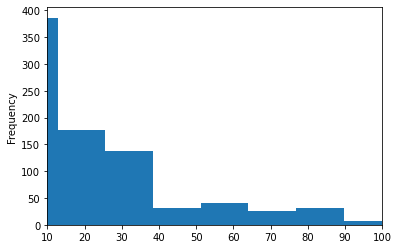

In [12]:
train_dummy['Fare'].plot(kind='hist', bins=40, xlim=(10,100))

In [13]:
#qcut : 나누고자 하는 범주 갯수만 정하면 알아서 나누어준다 (bin수치가 필요X)
train_dummy['Fare_cat'] = pd.qcut(train_dummy.Fare,5, labels=[*range(5)])
test_dummy['Fare_cat'] = pd.qcut(test_dummy.Fare,5, labels=[*range(5)])

In [14]:
train_dummy['Fare_cat'].value_counts()

1    184
3    180
0    180
4    176
2    171
Name: Fare_cat, dtype: int64

In [15]:
train_final = pd.get_dummies(train_dummy, columns=['Age_cat','Fare_cat','Pclass']).drop(['Age','Fare','Pclass'],axis=1, errors='ignore')
test_final = pd.get_dummies(test_dummy, columns=['Age_cat','Fare_cat','Pclass']).drop(['Age','Fare','Pclass'],axis=1, errors='ignore')

In [16]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   SibSp       891 non-null    int64
 2   Parch       891 non-null    int64
 3   Sex_female  891 non-null    uint8
 4   Sex_male    891 non-null    uint8
 5   Embarked_C  891 non-null    uint8
 6   Embarked_Q  891 non-null    uint8
 7   Embarked_S  891 non-null    uint8
 8   Cabin_C_A   891 non-null    uint8
 9   Cabin_C_B   891 non-null    uint8
 10  Cabin_C_C   891 non-null    uint8
 11  Cabin_C_D   891 non-null    uint8
 12  Cabin_C_E   891 non-null    uint8
 13  Cabin_C_F   891 non-null    uint8
 14  Cabin_C_G   891 non-null    uint8
 15  Cabin_C_X   891 non-null    uint8
 16  Age_cat_0   891 non-null    uint8
 17  Age_cat_1   891 non-null    uint8
 18  Age_cat_2   891 non-null    uint8
 19  Age_cat_3   891 non-null    uint8
 20  Age_cat_4   891 non-null    uint

In [17]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SibSp       418 non-null    int64
 1   Parch       418 non-null    int64
 2   Sex_female  418 non-null    uint8
 3   Sex_male    418 non-null    uint8
 4   Embarked_C  418 non-null    uint8
 5   Embarked_Q  418 non-null    uint8
 6   Embarked_S  418 non-null    uint8
 7   Cabin_C_A   418 non-null    uint8
 8   Cabin_C_B   418 non-null    uint8
 9   Cabin_C_C   418 non-null    uint8
 10  Cabin_C_D   418 non-null    uint8
 11  Cabin_C_E   418 non-null    uint8
 12  Cabin_C_F   418 non-null    uint8
 13  Cabin_C_G   418 non-null    uint8
 14  Cabin_C_X   418 non-null    uint8
 15  Age_cat_0   418 non-null    uint8
 16  Age_cat_1   418 non-null    uint8
 17  Age_cat_2   418 non-null    uint8
 18  Age_cat_3   418 non-null    uint8
 19  Age_cat_4   418 non-null    uint8
 20  Age_cat_5   418 non-null    uint

In [18]:
#생존율 예측을 위한 데이터 준비
X_train = train_final.drop("Survived",axis=1)
Y_train = train_final["Survived"]
X_test = test_final.copy()

In [19]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.9259259259259259

In [20]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

fit 결과 약 93%의 성능이 나오고 test 데이터를 이용한 예측 또한 가능해졌다.